In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating data

Simulating data is a very useful skill. 

Problem 1: Create a 1D numpy array called vrest that simulates resting potentials recorded from 200 cells. Assume that the population the cells come from has a resting potential of -50 (mV), and a standard deviation of 5 mV. Create a histogram of vrest to check that you did the simulation correctly. 

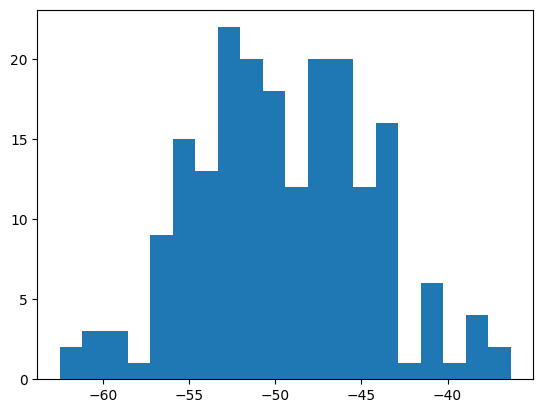

In [11]:
# ANSWER:
sd = 5
vrest = -50 * np.ones(200) + sd * np.random.randn(200)
plt.hist(vrest,20);

Problem 2: Suppose that neruons' peak firing rates are related to their resting potential through a simple linear relationship: 

Firing rate (in Hz) = -1 * resting potential + 20 + Noise

Where 'Noise' is the irreducible noise, and has a mean of 0 and a S.D. of 3

Creates a 1D numpy array called 'FR' that implements this mathematical relationship between firing rate and resting potential (for the same 200 neurons). Create a scatterplot between vrest (from above) and FR to verify that you have done this correctly. 

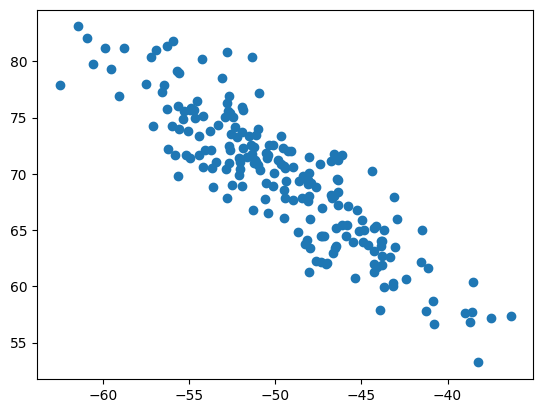

In [20]:
# ANSWER: 
noise = 3 * np.random.randn(200)
FR = -1 * vrest + 20 + noise
plt.scatter(vrest, FR)

Problem 3: Fit a linear relationship between vrest and FR using scikit learn. List the coefficients of the fit, as well as the intercept. You may need to reshape your array to force it to 1D. 

In [27]:
# ANSWER

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
regr = LR.fit(vrest.reshape(-1,1), FR.reshape(-1,1))
regr.coef_
regr.intercept_

array([17.24734352])

Problem 4: Re-run your analysis from above, but swap the variables such that firing rate is now the *independent variable* and resting potential is the *dependent variable*. As above, report the coefficients and intercept from your fit. What do you observe, and does this make sense? 

In [30]:
regr = LR.fit(FR.reshape(-1,1),vrest.reshape(-1,1))
regr.coef_
regr.intercept_

array([1.6140717])

Problem 5: Perform a KNN regression on the same dataset (where vrest is the independent variable, and FR is the dependent variable). Run this for the 5 different choices of the parameter n_neighbors shown below, which specifies the number of neighbors to use for prediction. For each run of KNN, report the score. What do you notice about the relationship between score values and number of neighbors? 

n_neighbors: [1, 2, 5, 10, 20, 50]

In [48]:
# ANSWER
from sklearn.neighbors import KNeighborsRegressor

X = vrest.reshape(-1,1)
y = FR.reshape(-1,1)
n_neighbors = [1, 2, 5, 10, 20, 50]
S = [] #array to hold model scores

for n in n_neighbors:
    KNN = KNeighborsRegressor(n_neighbors=n)
    score = KNN.fit(X,y).score(X,y)
    S.append(score)
print(S)

[1.0, 0.8813215770009809, 0.8119825554447991, 0.7997173252456751, 0.7780875179645609, 0.7177423786404922]


Problem 6: You'll note that some of the model scores above are quite high. In fact, you'll basically always do better on KNN regression if you use a smaller neighborhood. Why wouldn't you always use a neighbohood of one on every prediction task? You'll probably want to look a bit into the concept of **overfitting** 

# Covariance and Correlation

The snippet of code below creates a data frame with three sets of noisy measurements with some pairwise correlation. 

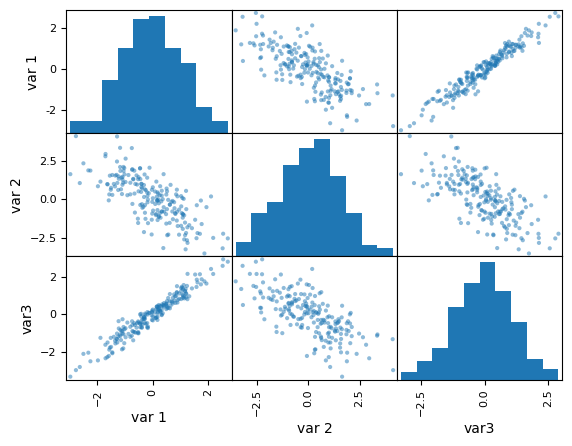

In [64]:
d1 = np.random.randn(200)
d2 = -1 * d1 + np.random.randn(200)
d3 = d1 + 0.3 * np.random.randn(200)

df = pd.DataFrame(data={'var 1': d1, 'var 2': d2, 'var3': d3})
pd.plotting.scatter_matrix(df);

Problem 7: Calculate the covariance between d1 and d3 using the numpy expression np.dot(). Note that you don't need to subtract the mean from anything, because all the data we created have zero mean (verify in the histograms above). 

In [68]:
# ANSWER: 
np.dot(d1,d3) * 1/199

1.191999401305958